In [1]:
import h5py

In [2]:
f = h5py.File('../event_dump.h5','r')
event_data = f['event_data'][:]

In [3]:
from __future__ import print_function
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

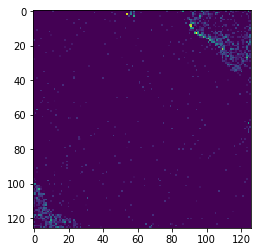

In [5]:
plt.imshow(event_data[0,:,:,0])

Time in 1D array (15876,) which length should be around 12,000


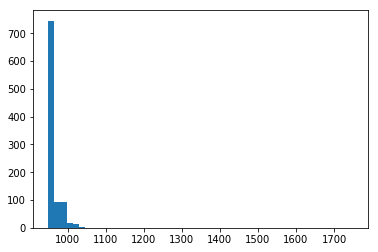

Time min, max, mean are: 949.0 1749.0 962.00195


In [6]:
# plot time distribution
chrg_1d = f['event_data'][0,:,:,0].reshape([-1])
time_1d = f['event_data'][0,:,:,1].reshape([-1])
print ('Time in 1D array', time_1d.shape, 'which length should be around 12,000')

# Further, let's filter out to keep only non-zero elements
time_1d = time_1d[chrg_1d>0]
chrg_1d = chrg_1d[chrg_1d>0]

# Make 1D histogram
_ = plt.hist(time_1d,bins=50)
plt.show()

# Let's print out min, max, mean
print ('Time min, max, mean are:', time_1d.min(), time_1d.max(), time_1d.mean())

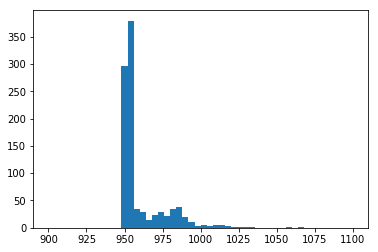

In [7]:
_ = plt.hist(time_1d,bins=50,range=(900,1100))
plt.show()

Energies in 1D array (3000,) length is number of events


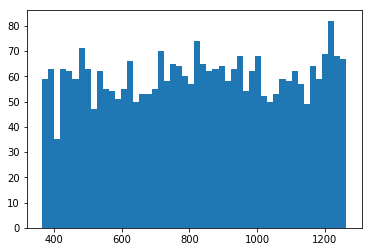

In [9]:
# plot energy distribution
energies = f['energies'][:,0].reshape([-1])
print ('Energies in 1D array', energies.shape, 'length is number of events')

# Make 1D histogram
_ = plt.hist(energies,bins=50)
plt.show()

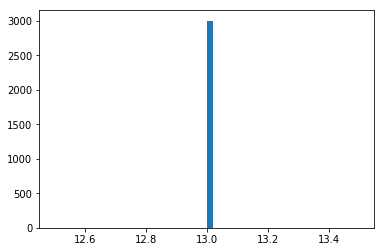

In [10]:
# plot pids
pids     = f['pids'][:,0].reshape([-1])

# Make 1D histogram
_ = plt.hist(pids,bins=50)
plt.show()

Positions in 1D array (3000,) length is number of events


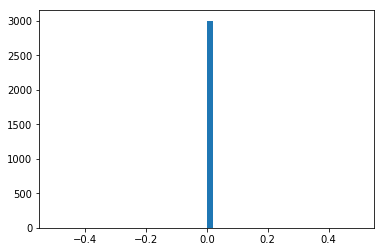

In [ ]:
# plot vertex distribution
posx = f['positions'][:,0,0]
print ('Positions in 1D array', posx.shape, 'length is number of events')

# Make 1D histogram
_ = plt.hist(posx,bins=50)
plt.show()

Positions in 1D array (3000,) length is number of events


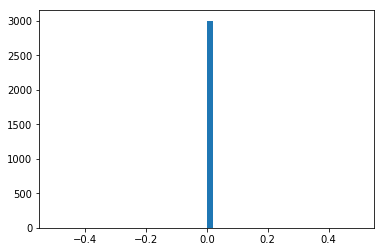

In [ ]:
# plot vertex distribution
posy = f['positions'][:,0,1]
print ('Positions in 1D array', posy.shape, 'length is number of events')

# Make 1D histogram
_ = plt.hist(posy,bins=50)
plt.show()

Positions in 1D array (3000,) length is number of events


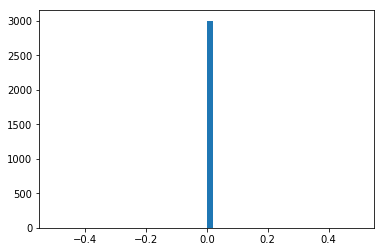

In [ ]:
# plot vertex distribution
posz = f['positions'][:,0,2]
print ('Positions in 1D array', posz.shape, 'length is number of events')

# Make 1D histogram
_ = plt.hist(posz,bins=50)
plt.show()

In [ ]:
# plot vertex distribution
dirx = f['directions'][:,0,0]
print ('Positions in 1D array', dirx.shape, 'length is number of events')

# Make 1D histogram
_ = plt.hist(dirx,bins=50)
plt.show()

Positions in 1D array (3000,) length is number of events


In [ ]:
# plot vertex distribution
diry = f['directions'][:,0,1]
print ('Positions in 1D array', diry.shape, 'length is number of events')

# Make 1D histogram
_ = plt.hist(diry,bins=50)
plt.show()

Positions in 1D array (3000,) length is number of events


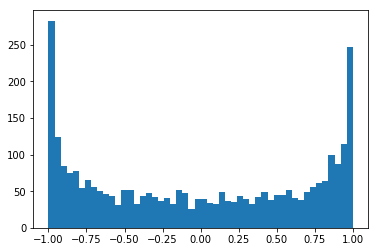

In [7]:
# plot vertex distribution
dirz = f['directions'][:,0,2]
print ('Positions in 1D array', dirz.shape, 'length is number of events')

# Make 1D histogram
_ = plt.hist(dirz,bins=50)
plt.show()

In [8]:
import torch

def geometricPad(grid, pad=1):
  M = grid.shape[0];
  M_new = pad+M+pad;
  grid_new = torch.zeros(M_new*M_new).reshape(M_new, M_new);
  grid_new[pad:M+pad,pad:M+pad] = grid;
  grid_new[0:pad,pad:(M+pad)] = grid[:,0:pad].flip(1).t();
  grid_new[pad:(M+pad),0:pad] = grid[0:pad,:].flip(0).t();
  grid_new[(M+pad):(M+pad+pad),(pad):(M+pad)] = grid[:,(M-pad):].flip(1).t();
  grid_new[pad:(M+pad),(M+pad):(M+pad+pad)] = grid[(M-pad):,:].flip(0).t();
  return(grid_new);

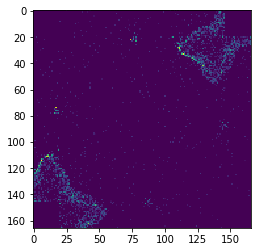

In [9]:
plt.imshow(geometricPad(torch.tensor(event_data[0,:,:,0]), 20))

In [10]:
Cin = 1; # Q
Hin = event_data.shape[1];
Win = event_data.shape[2];

pad = 2;

Cout = 4;
Hflt = 2*pad+1;
Wflt = 2*pad+1;

filters = torch.randn(Cout,Cin,Hflt,Wflt);
inputs = geometricPad(torch.tensor(event_data[0,:,:,0]), pad).unsqueeze(0).unsqueeze(0);
outputs = torch.nn.functional.conv2d(inputs, filters);

print('filters.shape = ', filters.shape, 'should be (',Cout,',',Cin,',',Hflt,',',Wflt,')');
print('inputs .shape = ', inputs.shape, 'should be (1,',Cin,',',Hin+2*pad,',',Win+2*pad,')');
print('outputs.shape = ', outputs.shape, 'should be (1,',Cout,',',Hin,',',Win,')');

filters.shape =  torch.Size([4, 1, 5, 5]) should be ( 4 , 1 , 5 , 5 )
inputs .shape =  torch.Size([1, 1, 130, 130]) should be (1, 1 , 130 , 130 )
outputs.shape =  torch.Size([1, 4, 126, 126]) should be (1, 4 , 126 , 126 )


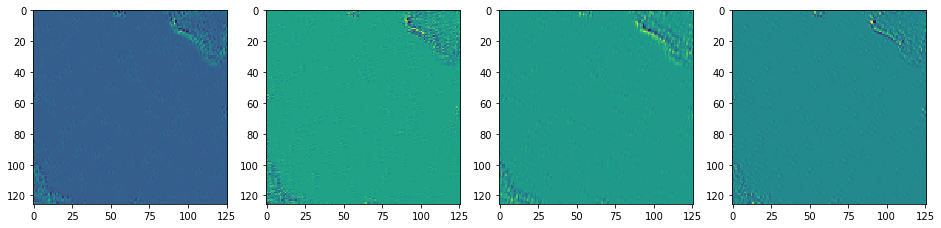

In [11]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(16,8),facecolor='w')
ax0.imshow(outputs[0,0,:,:])
ax1.imshow(outputs[0,1,:,:])
ax2.imshow(outputs[0,2,:,:])
ax3.imshow(outputs[0,3,:,:])
plt.show()

In [12]:
def geometricPad(grid, pad=1):
  M = grid.shape[2]; # 0:batchsize, 1:channels, 2:width, 3:height
  M_new = pad+M+pad;
  new_shape = (grid.shape[0], grid.shape[1], M_new, M_new)
  grid_new = torch.zeros(new_shape);
  grid_new[:,:,pad:M+pad,pad:M+pad] = grid;
  grid_new[:,:,0:pad,pad:(M+pad)] = grid[:,:,:,0:pad].flip(-1).transpose(-1,-2);
  grid_new[:,:,pad:(M+pad),0:pad] = grid[:,:,0:pad,:].flip(-2).transpose(-1,-2);
  grid_new[:,:,(M+pad):(M+pad+pad),(pad):(M+pad)] = grid[:,:,:,(M-pad):].flip(-1).transpose(-1,-2);
  grid_new[:,:,pad:(M+pad),(M+pad):(M+pad+pad)] = grid[:,:,(M-pad):,:].flip(-2).transpose(-1,-2);
  return(grid_new);

In [13]:
Cin = 1; # Q
Hin = event_data.shape[1];
Win = event_data.shape[2];

pad = 2;

Cout = 4;
Hflt = 2*pad+1;
Wflt = 2*pad+1;

filters = torch.randn(Cout,Cin,Hflt,Wflt);
inputs = torch.tensor(event_data[0:5,:,:,0]).unsqueeze(1);
outputs = torch.nn.functional.conv2d(geometricPad(inputs, pad), filters);

print('filters.shape = ', filters.shape, 'should be (',Cout,',',Cin,',',Hflt,',',Wflt,')');
print('inputs .shape = ', inputs.shape, 'should be (5,',Cin,',',Hin,',',Win,')');
print('outputs.shape = ', outputs.shape, 'should be (5,',Cout,',',Hin,',',Win,')');

filters.shape =  torch.Size([4, 1, 5, 5]) should be ( 4 , 1 , 5 , 5 )
inputs .shape =  torch.Size([5, 1, 126, 126]) should be (5, 1 , 126 , 126 )
outputs.shape =  torch.Size([5, 4, 126, 126]) should be (5, 4 , 126 , 126 )


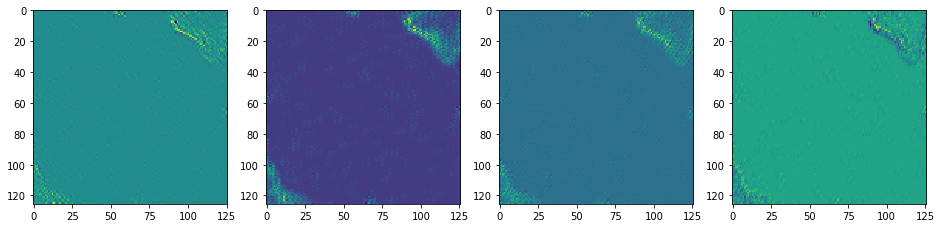

In [14]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(16,8),facecolor='w')
ax0.imshow(outputs[0,0,:,:])
ax1.imshow(outputs[0,1,:,:])
ax2.imshow(outputs[0,2,:,:])
ax3.imshow(outputs[0,3,:,:])
plt.show()

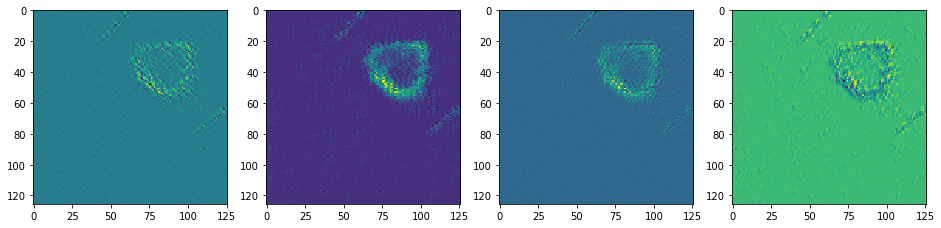

In [15]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(16,8),facecolor='w')
ax0.imshow(outputs[1,0,:,:])
ax1.imshow(outputs[1,1,:,:])
ax2.imshow(outputs[1,2,:,:])
ax3.imshow(outputs[1,3,:,:])
plt.show()

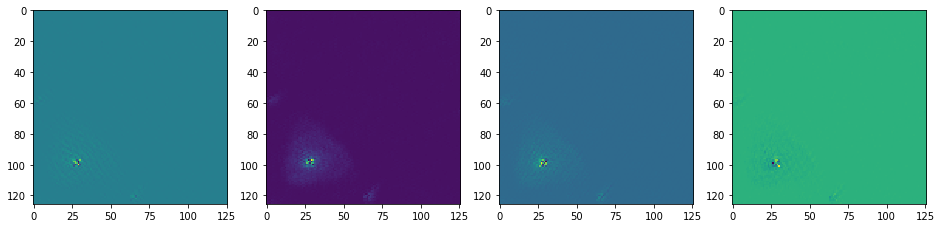

In [16]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(16,8),facecolor='w')
ax0.imshow(outputs[2,0,:,:])
ax1.imshow(outputs[2,1,:,:])
ax2.imshow(outputs[2,2,:,:])
ax3.imshow(outputs[2,3,:,:])
plt.show()

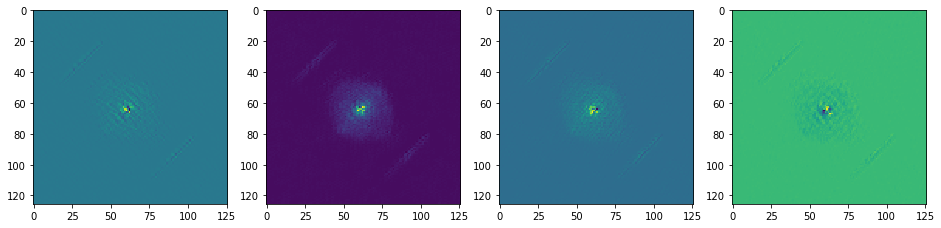

In [17]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(16,8),facecolor='w')
ax0.imshow(outputs[3,0,:,:])
ax1.imshow(outputs[3,1,:,:])
ax2.imshow(outputs[3,2,:,:])
ax3.imshow(outputs[3,3,:,:])
plt.show()

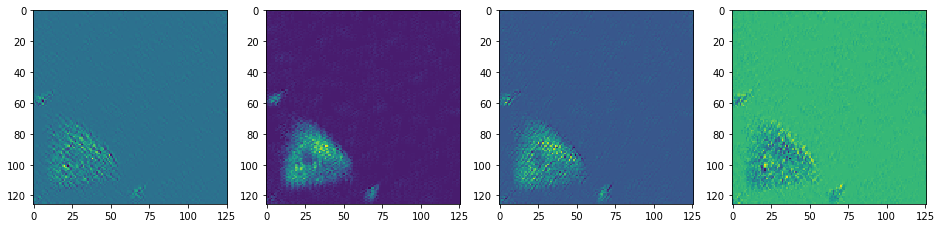

In [18]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(16,8),facecolor='w')
ax0.imshow(outputs[4,0,:,:])
ax1.imshow(outputs[4,1,:,:])
ax2.imshow(outputs[4,2,:,:])
ax3.imshow(outputs[4,3,:,:])
plt.show()

In [19]:
class CNN(torch.nn.Module):
    
    def __init__(self, num_class):
        
        super(CNN, self).__init__()
        # feature extractor CNN
        self._feature = torch.nn.Sequential(
            # B,C=2,H=126,W=126
            #self.pad,
            torch.nn.Conv2d(2,16,3,padding=1), torch.nn.ReLU(),
            # B,C=16,H=126,W=126
            torch.nn.MaxPool2d(2,2),
            # B,C=16,H=63,W=63
            torch.nn.Conv2d(16,32,3,padding=1), torch.nn.ReLU())
            # B,C=32,H=63,W=63
            #torch.nn.Conv2d(32,32,3,padding=1), torch.nn.ReLU())
            # B,C=32,H=63,W=63
            #torch.nn.MaxPool2d(2,2),
            #torch.nn.Conv2d(32,64,3), torch.nn.ReLU(),
            #torch.nn.Conv2d(64,64,3), torch.nn.ReLU(),
            #torch.nn.MaxPool2d(2,2),
            #torch.nn.Conv2d(64,128,3), torch.nn.ReLU(),
            #torch.nn.Conv2d(128,128,3), torch.nn.ReLU())
        self._classifier = torch.nn.Sequential(
            torch.nn.Linear(32,32), torch.nn.ReLU(),
            #torch.nn.Linear(128,128), torch.nn.ReLU(),
            torch.nn.Linear(32,num_class)
        )

    def forward(self, x):
        net = self._feature(x)
        net = torch.nn.AvgPool2d(net.size()[2:])(net)
        return self._classifier(net.view(-1,32))
    
    #def pad(self, x):
        

In [20]:
class BLOB:
    pass
blob=BLOB()
blob.net       = CNN(2).cuda() # construct Lenet for 3 class classification, use GPU
blob.criterion = torch.nn.CrossEntropyLoss() # use softmax loss to define an error
blob.optimizer = torch.optim.Adam(blob.net.parameters()) # use Adam optimizer algorithm
blob.softmax   = torch.nn.Softmax(dim=1) # not for training, but softmax score for each class
blob.data      = None # data for training/analysis
blob.label     = None # label for training/analysis

In [21]:
def forward(blob,train=True):
    """
       Args: blob should have attributes, net, criterion, softmax, data, label
       Returns: a dictionary of predicted labels, softmax, loss, and accuracy
    """
    with torch.set_grad_enabled(train):
        # Prediction
        data = torch.as_tensor(blob.data).cuda()#[torch.as_tensor(d).cuda() for d in blob.data]
        data = data.permute(0,3,1,2)
        prediction = blob.net(data)
        # Training
        loss,acc=-1,-1
        if blob.label is not None:
            label = torch.as_tensor(blob.label).type(torch.LongTensor).cuda()#[torch.as_tensor(l).cuda() for l in blob.label]
            label.requires_grad = False
            loss = blob.criterion(prediction,label)
        blob.loss = loss
        
        softmax    = blob.softmax(prediction).cpu().detach().numpy()
        prediction = torch.argmax(prediction,dim=-1)
        accuracy   = (prediction == label).sum().item() / float(prediction.nelement())        
        prediction = prediction.cpu().detach().numpy()
        
        return {'prediction' : prediction,
                'softmax'    : softmax,
                'loss'       : loss.cpu().detach().item(),
                'accuracy'   : accuracy}

def backward(blob):
    blob.optimizer.zero_grad()  # Reset gradients accumulation
    blob.loss.backward()
    blob.optimizer.step()

In [22]:
f['energies'][()]>500.

array([[False, False],
       [False, False],
       [ True, False],
       ...,
       [ True, False],
       [False, False],
       [ True, False]])

H5Dataset from https://github.com/WatChMaL/ExampleNotebooks/blob/master/HKML%20DataLoader.ipynb

In [23]:
from torch.utils.data import Dataset, DataLoader

class H5Dataset(Dataset):

    def __init__(self, files, transform=None, flavour=None, limit_num_files=0, start_fraction=0., use_fraction=1.0):
        """                                                                                                                                             
        Args: data_dirs ... a list of data directories to find files (up to 10 files read from each dir)                                                
              transform ... a function applied to pre-process data                                                                                      
              flavour ..... a string that is required to be present in the filename                                                                     
              limit_num_files ... an integer limiting number of files to be taken per data directory                                                    
              start_fraction ... a floating point fraction (0.0=>1.0) to specify which entry to start reading (per file)                                
              use_fraction ..... a floating point fraction (0.0=>1.0) to specify how much fraction of a file to be read out (per file)                  
        """
        self._transform = transform
        self._files = []

        # Check input fractions makes sense                                                                                                             
        assert start_fraction >= 0. and start_fraction < 1.
        assert use_fraction > 0. and use_fraction <= 1.
        assert (start_fraction + use_fraction) <= 1.

        # Load files (up to 10) from each directory in data_dirs list                                                                                   
        # for d in data_dirs:
        #     file_list = [ os.path.join(d,f) for f in os.listdir(d) if flavour is None or flavour in f ]
        #     if limit_num_files: file_list = file_list[0:limit_num_files]
        #     self._files += file_list
        self._files = files

        self._file_handles = [None] * len(self._files)
        self._event_to_file_index  = []
        self._event_to_entry_index = []
        import h5py
        for file_index, file_name in enumerate(self._files):
            f = h5py.File(file_name,mode='r')
            data_size = f['event_data'].shape[0]
            start_entry = int(start_fraction * data_size)
            num_entries = int(use_fraction * data_size)
            self._event_to_file_index += [file_index] * num_entries
            self._event_to_entry_index += range(start_entry, start_entry+num_entries)
            f.close()

    def __len__(self):
        return len(self._event_to_file_index)

    def __getitem__(self,idx):
        file_index = self._event_to_file_index[idx]
        entry_index = self._event_to_entry_index[idx]
        if self._file_handles[file_index] is None:
            import h5py
            self._file_handles[file_index] = h5py.File(self._files[file_index],mode='r')
        fh = self._file_handles[file_index]
        labels = (fh['energies'][entry_index,0]>500.)-0
        #return fh['event_data'][entry_index],fh['labels'][entry_index],idx
        return fh['event_data'][entry_index],labels,idx

In [24]:
f.close()

3000 total events are loaded!
Entry 0 ... label: 0 ... data shape: (126, 126, 2)


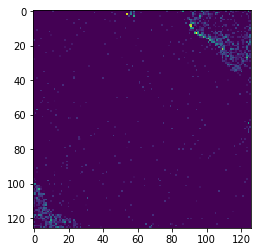

In [25]:
ds = H5Dataset(['../event_dump.h5'])
print(len(ds),'total events are loaded!')

ENTRY = 0
# Access an index
data,label,idx = ds[ENTRY]
# Data shape
print('Entry',ENTRY,'... label:',label,'... data shape:',data.shape)
# Visualize
plt.imshow(data[:,:,0])
plt.show()

In [26]:
def HKCollate(batch):
    data  = np.stack([sample[0] for sample in batch])
    label = [sample[1] for sample in batch]
    idx   = [sample[2] for sample in batch]
    return data,label,idx

In [27]:
loader = DataLoader(ds,
                    batch_size=5,  # set the batch size = 50
                    shuffle=True,  # enable randomization of samples in a batch
                    num_workers=1, # number of workers to parallelize data streaming
                    collate_fn=HKCollate # collation method
                   )
#time_record = loop(loader,10)
#print('Overall average iteration time:',time_record.mean(),'[s]')
#print('First event     iteration time:',time_record[0],    '[s]')
#print('After first event average time:',time_record[1:].mean(),'[s]')

In [28]:
for i,data in enumerate(loader):
    break

data[0].shape

(5, 126, 126, 2)

In [29]:
import time

# Set the network to training mode
blob.net.train()
train_loader = loader

# Start training
for i,data in enumerate(train_loader):
    break

# Data and label
blob.data,blob.label = data[0:2]
# Call forward: make a prediction & measure the average error
res = forward(blob,True)
# Call backward: backpropagate error and update weights


In [30]:
res

{'prediction': array([1, 1, 1, 1, 1]),
 'softmax': array([[1.8706825e-10, 1.0000000e+00],
        [2.2398478e-15, 1.0000000e+00],
        [3.9373123e-08, 1.0000000e+00],
        [2.2946773e-09, 1.0000000e+00],
        [3.4867631e-15, 1.0000000e+00]], dtype=float32),
 'loss': 7.388571262359619,
 'accuracy': 0.6}

In [31]:
blob.optimizer.zero_grad()  # Reset gradients accumulation
#blob.loss.backward()
#blob.optimizer.step()

In [34]:
blob.loss.backward()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [35]:
train_ds = H5Dataset(['../event_dump.h5'],start_fraction=0.0,use_fraction=0.9);
test_ds  = H5Dataset(['../event_dump.h5'],start_fraction=0.9,use_fraction=0.1);

# for training
train_loader=DataLoader(train_ds,batch_size= 64,shuffle=True,num_workers=4,collate_fn=HKCollate)
# for validation
test_loader =DataLoader( test_ds,batch_size=200,shuffle=True,num_workers=2,collate_fn=HKCollate)

In [41]:
import time
from utils.utils import progress_bar, CSVData

blob.train_log, blob.test_log = CSVData('log_train.csv'), CSVData('log_test.csv')

# Define train period. "epoch" = N image consumption where N is the total number of train samples.
TRAIN_EPOCH=3.0
# Set the network to training mode
blob.net.train()
epoch=0.
iteration=0

# Start training
while int(epoch+0.5) < TRAIN_EPOCH:
    print('Epoch',int(epoch+0.5),'Starting @',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
    # Create a progress bar for this epoch
    progress = display(progress_bar(0,len(train_loader)),display_id=True)
    # Loop over data samples and into the network forward function
    for i,data in enumerate(train_loader):
        # Data and label
        blob.data,blob.label = data[0:2]
        # Call forward: make a prediction & measure the average error
        res = forward(blob,True)
        # Call backward: backpropagate error and update weights
        backward(blob)
        # Epoch update
        epoch += 1./len(train_loader)
        iteration += 1
        
        #
        # Log/Report
        #
        # Record the current performance on train set
        blob.train_log.record(['iteration','epoch','accuracy','loss'],[iteration,epoch,res['accuracy'],res['loss']])
        blob.train_log.write()
        # once in a while, report
        if i==0 or (i+1)%10 == 0:
            message = '... Iteration %d ... Epoch %1.2f ... Loss %1.3f ... Accuracy %1.3f' % (iteration,epoch,res['loss'],res['accuracy'])
            progress.update(progress_bar((i+1),len(train_loader),message))
        # more rarely, run validation
        if (i+1)%40 == 0:
            with torch.no_grad():
                blob.net.eval()
                test_data = next(iter(test_loader))
                blob.data,blob.label = test_data[0:2]
                res = forward(blob,False)
                blob.test_log.record(['iteration','epoch','accuracy','loss'],[iteration,epoch,res['accuracy'],res['loss']])
                blob.test_log.write()
            blob.net.train()
        if epoch >= TRAIN_EPOCH:
            break
    message = '... Iteration %d ... Epoch %1.2f ... Loss %1.3f ... Accuracy %1.3f' % (iteration,epoch,res['loss'],res['accuracy'])
    #print(message)
    progress.update(progress_bar((i+1),len(train_loader),message))

blob.test_log.close()
blob.train_log.close()

Epoch 0 Starting @ 2019-08-03 13:31:22


Epoch 1 Starting @ 2019-08-03 13:32:28


Epoch 2 Starting @ 2019-08-03 13:32:34


In [42]:
blob.test_log.name

'log_test.csv'

In [43]:
blob.train_log.name

'log_train.csv'

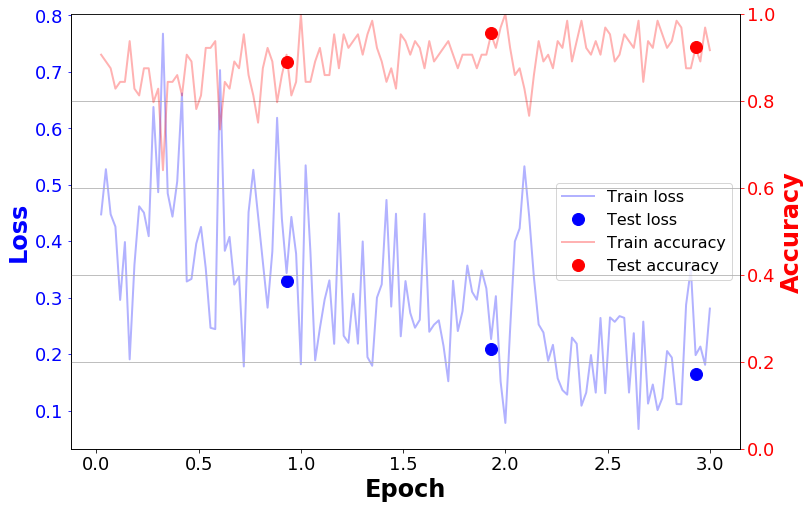

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train_log = pd.read_csv(blob.train_log.name)
test_log  = pd.read_csv(blob.test_log.name)

fig, ax1 = plt.subplots(figsize=(12,8),facecolor='w')
line11 = ax1.plot(train_log.epoch, train_log.loss, linewidth=2, label='Train loss', color='b', alpha=0.3)
line12 = ax1.plot(test_log.epoch, test_log.loss, marker='o', markersize=12, linestyle='', label='Test loss', color='blue')
ax1.set_xlabel('Epoch',fontweight='bold',fontsize=24,color='black')
ax1.tick_params('x',colors='black',labelsize=18)
ax1.set_ylabel('Loss', fontsize=24, fontweight='bold',color='b')
ax1.tick_params('y',colors='b',labelsize=18)

ax2 = ax1.twinx()
line21 = ax2.plot(train_log.epoch, train_log.accuracy, linewidth=2, label='Train accuracy', color='r', alpha=0.3)
line22 = ax2.plot(test_log.epoch, test_log.accuracy, marker='o', markersize=12, linestyle='', label='Test accuracy', color='red')

ax2.set_ylabel('Accuracy', fontsize=24, fontweight='bold',color='r')
ax2.tick_params('y',colors='r',labelsize=18)
ax2.set_ylim(0.,1.0)

# added these four lines
lines  = line11 + line12 + line21 + line22
labels = [l.get_label() for l in lines]
leg    = ax1.legend(lines, labels, fontsize=16, loc=5)
leg_frame = leg.get_frame()
leg_frame.set_facecolor('white')

plt.grid()
plt.show()

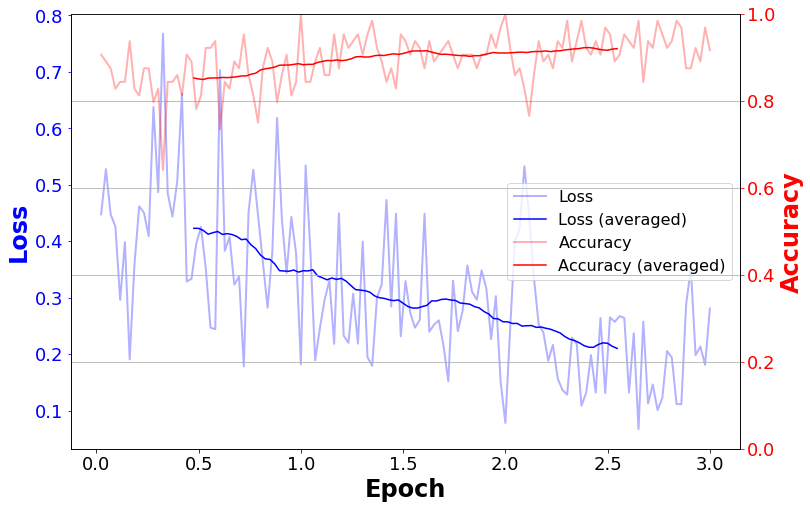

In [45]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

epoch    = moving_average(np.array(train_log.epoch),40)
accuracy = moving_average(np.array(train_log.accuracy),40)
loss     = moving_average(np.array(train_log.loss),40)

fig, ax1 = plt.subplots(figsize=(12,8),facecolor='w')
line11 = ax1.plot(train_log.epoch, train_log.loss, linewidth=2, label='Loss', color='b', alpha=0.3)
line12 = ax1.plot(epoch, loss, label='Loss (averaged)', color='blue')
ax1.set_xlabel('Epoch',fontweight='bold',fontsize=24,color='black')
ax1.tick_params('x',colors='black',labelsize=18)
ax1.set_ylabel('Loss', fontsize=24, fontweight='bold',color='b')
ax1.tick_params('y',colors='b',labelsize=18)

ax2 = ax1.twinx()
line21 = ax2.plot(train_log.epoch, train_log.accuracy, linewidth=2, label='Accuracy', color='r', alpha=0.3)
line22 = ax2.plot(epoch, accuracy, label='Accuracy (averaged)', color='red')

ax2.set_ylabel('Accuracy', fontsize=24, fontweight='bold',color='r')
ax2.tick_params('y',colors='r',labelsize=18)
ax2.set_ylim(0.,1.0)

# added these four lines
lines  = line11 + line12 + line21 + line22
labels = [l.get_label() for l in lines]
leg    = ax1.legend(lines, labels, fontsize=16, loc=5)
leg_frame = leg.get_frame()
leg_frame.set_facecolor('white')

plt.grid()
plt.show()

In [46]:
def inference(blob,data_loader):
    label,prediction,accuracy=[],[],[]
    # set the network to test (non-train) mode
    blob.net.eval()
    # create the result holder
    index,label,prediction = [],[],[]
    for i,data in enumerate(data_loader):
        blob.data, blob.label = data[0:2]
        res = forward(blob,True)
        accuracy.append(res['accuracy'])
        prediction.append(res['prediction'])
        label.append(blob.label)
        #if i==2: break
    # report accuracy
    accuracy   = np.array(accuracy,dtype=np.float32)
    label      = np.hstack(label)
    prediction = np.hstack(prediction)
    
    return accuracy, label, prediction

Accuracy mean 0.9275 std 0.017499983


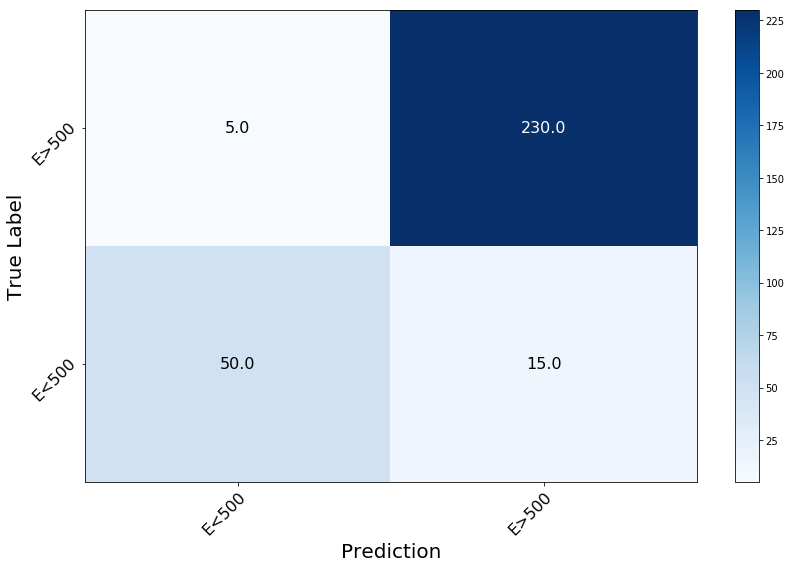

In [47]:
from utils.utils import plot_confusion_matrix
accuracy,label,prediction = inference(blob,test_loader)
print('Accuracy mean',accuracy.mean(),'std',accuracy.std())
plot_confusion_matrix(label,prediction,['E<500','E>500'])